## Importing Libaries

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from plotly.offline import iplot
import plotly as py
import statsmodels.api as sm
from sklearn import metrics

from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from scipy import stats
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn import svm
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.inspection import permutation_importance
from sklearn.metrics import classification_report

## Reading Dataset

In [71]:
fraudData = pd.read_csv('/Users/pratik_4511/Desktop/Northeastern University /Quarter_5A/Leadership in Analytics/fraudTest.csv')
fraudData.head(5)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,ID,gender,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,21/06/20 12:14,2.290000e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,JeffElliott,M,...,33.9659,-80.9355,333497,Mechanical engineer,19/03/68,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,21/06/20 12:14,3.570000e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,JoanneWilliams,F,...,40.3207,-110.4360,302,"Sales professional, IT",17/01/90,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,21/06/20 12:14,3.600000e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,AshleyLopez,F,...,40.6729,-73.5365,34496,"Librarian, public",21/10/70,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,21/06/20 12:15,3.590000e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,BrianWilliams,M,...,28.5697,-80.8191,54767,Set designer,25/07/87,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,21/06/20 12:15,3.530000e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,NathanMassey,M,...,44.2529,-85.0170,1126,Furniture designer,06/07/55,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


## Basic EDAs

In [72]:
# description of data
fraudData.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,555719.000000,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,277859.000000,4.178627e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
std,160422.401459,1.309920e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,138929.500000,1.800000e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,277859.000000,3.520000e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,416788.500000,4.640000e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000
max,555718.000000,4.990000e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000


In [73]:
print(fraudData['is_fraud'].unique())

[0 1]


In [74]:
# data info
fraudData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  float64
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   ID                     555719 non-null  object 
 9   gender                 555719 non-null  object 
 10  street                 555719 non-null  object 
 11  city                   555719 non-null  object 
 12  state                  555719 non-null  object 
 13  zip                    555719 non-null  int64  
 14  lat                    555719 non-nu

In [75]:
# shape of data
fraudData.shape

(555719, 24)

In [76]:
# null values 
fraudData.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
ID                       0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [77]:
# dropping unnecessary columns
fraudData.drop(['Unnamed: 0'], axis=1, inplace=True)

In [78]:
fraudData['is_fraud'] = fraudData['is_fraud'].astype(bool)

In [79]:
# columns 
fraudData.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'ID', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

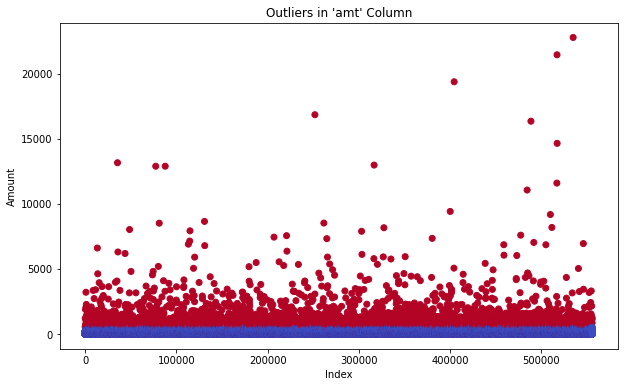

In [80]:
# Select numeric columns
numeric_columns = ['amt', 'city_pop', 'unix_time']

# Calculate mean and standard deviation
means = fraudData[numeric_columns].mean()
stds = fraudData[numeric_columns].std()

# Apply 3-sigma rule to identify outliers
lower_threshold = means - 3 * stds
upper_threshold = means + 3 * stds
outliers = (fraudData[numeric_columns] < lower_threshold) | (fraudData[numeric_columns] > upper_threshold)

# Visualize outliers
plt.figure(figsize=(10, 6))
fraudData['outlier'] = outliers.any(axis=1)
plt.scatter(fraudData.index, fraudData['amt'], c=fraudData['outlier'], cmap='coolwarm')
plt.title("Outliers in 'amt' Column")
plt.xlabel("Index")
plt.ylabel("Amount")
plt.show()

# Handle outliers (example: replace with NaN)
fraudData[outliers] = np.nan

# Remove the 'outlier' column
fraudData.drop('outlier', axis=1, inplace=True)

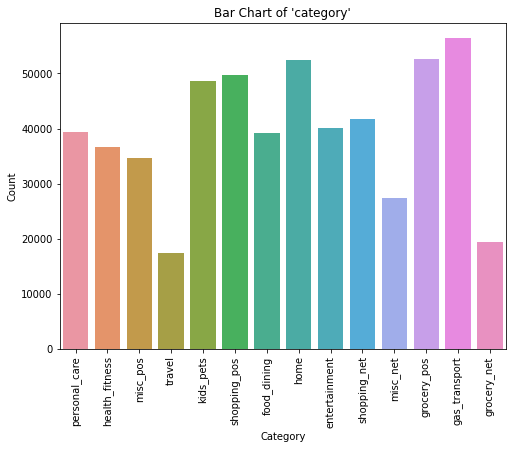

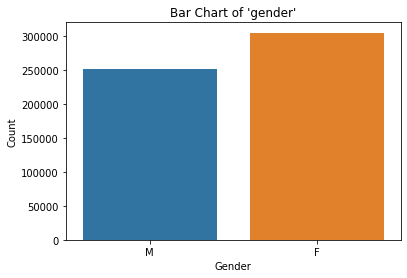

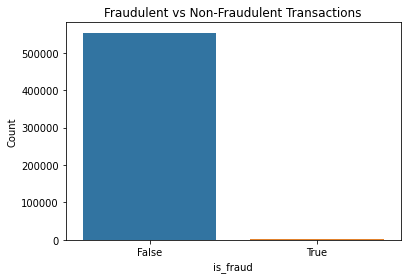

In [81]:
# bar plots 

# Bar chart for 'category'
plt.figure(figsize=(8, 6))
sns.countplot(x='category', data=fraudData)
plt.title("Bar Chart of 'category'")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

# Bar chart for 'gender'
plt.figure(figsize=(6, 4))
sns.countplot(x='gender', data=fraudData)
plt.title("Bar Chart of 'gender'")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

# Bar chart for 'is fraud'
plt.figure(figsize=(6, 4))
sns.countplot(x='is_fraud', data=fraudData)
plt.title("Fraudulent vs Non-Fraudulent Transactions")
plt.xlabel("is_fraud")
plt.ylabel("Count")
plt.show()

In [82]:
# Pairplot
#sns.pairplot(fraudData)
#plt.title("Pairplot of Columns")
#plt.show()

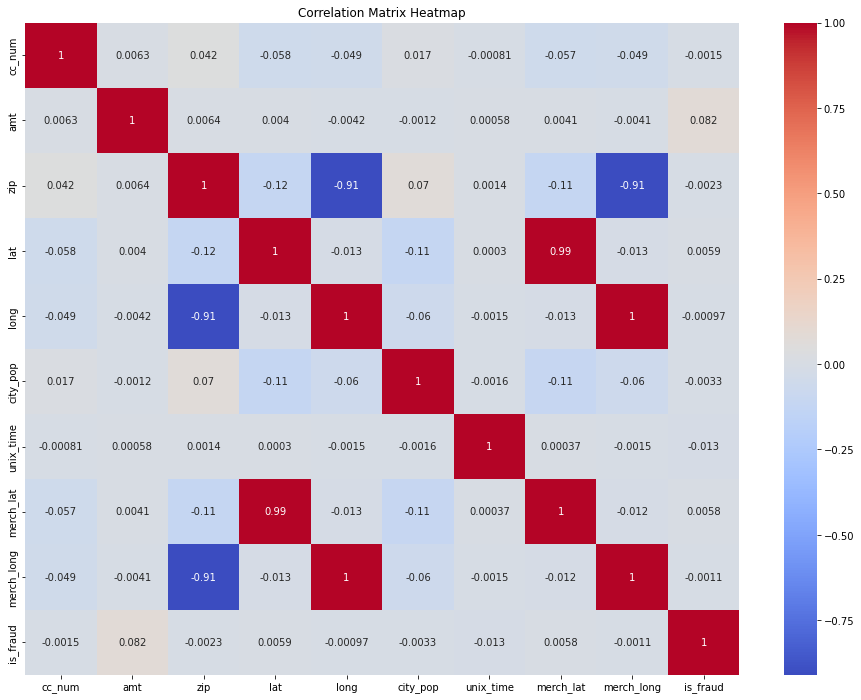

In [83]:
# Heatmap of Correlation Matrix
corr_matrix = fraudData.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix Heatmap")
plt.show()

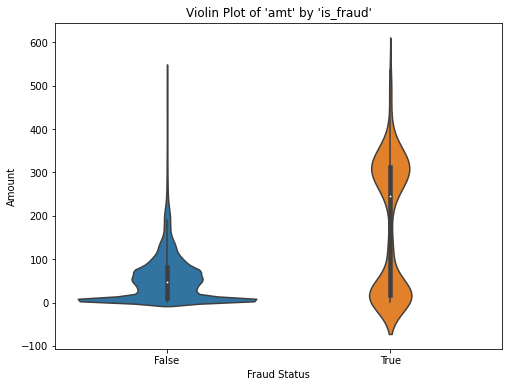

In [84]:
# Violin Plot of 'amt' by 'is_fraud'
plt.figure(figsize=(8, 6))
sns.violinplot(x='is_fraud', y='amt', data=fraudData)
plt.title("Violin Plot of 'amt' by 'is_fraud'")
plt.xlabel("Fraud Status")
plt.ylabel("Amount")
plt.show()

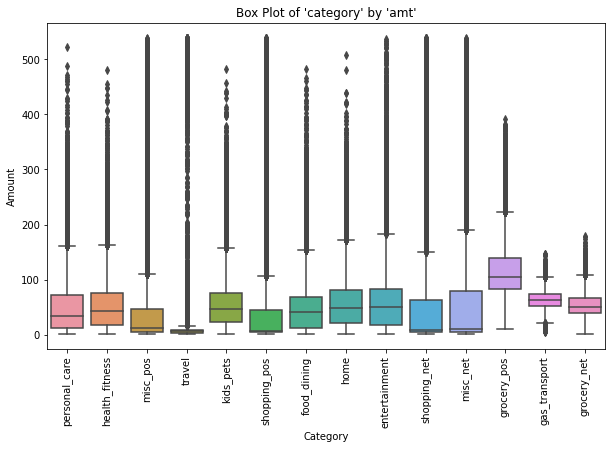

In [85]:
# Box Plot of 'category' by 'amt'
plt.figure(figsize=(10, 6))
sns.boxplot(x='category', y='amt', data=fraudData)
plt.title("Box Plot of 'category' by 'amt'")
plt.xlabel("Category")
plt.ylabel("Amount")
plt.xticks(rotation=90)
plt.show()

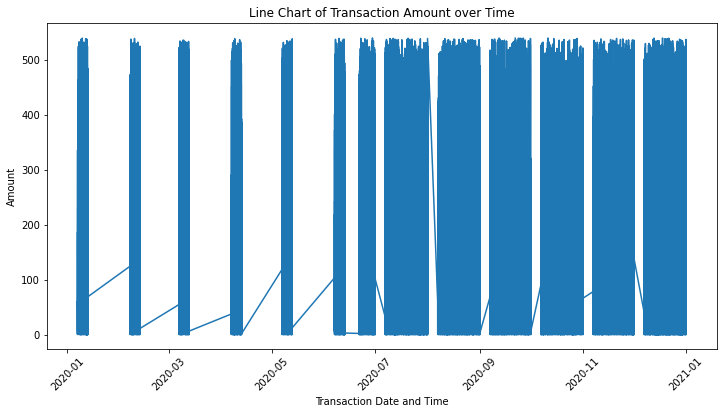

In [86]:
# Convert 'trans_date_trans_time' to datetime format
fraudData['trans_date_trans_time'] = pd.to_datetime(fraudData['trans_date_trans_time'])

# Sort the dataframe by 'trans_date_trans_time'
fraudData.sort_values(by='trans_date_trans_time', inplace=True)

# Create the line chart
plt.figure(figsize=(12, 6))
plt.plot(fraudData['trans_date_trans_time'], fraudData['amt'])
plt.title("Line Chart of Transaction Amount over Time")
plt.xlabel("Transaction Date and Time")
plt.ylabel("Amount")
plt.xticks(rotation=45)
plt.show()

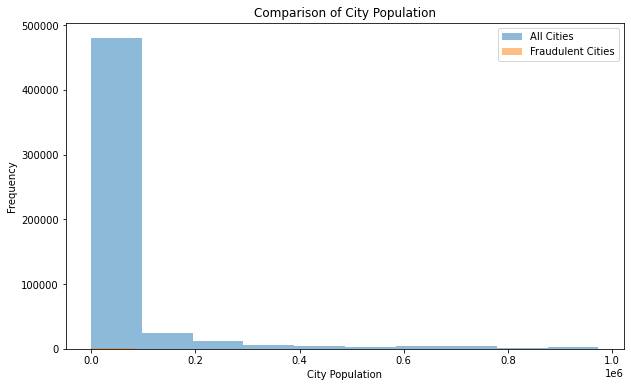

In [87]:
# Create the histograms
plt.figure(figsize=(10, 6))
plt.hist(fraudData['city_pop'], bins=10, alpha=0.5, label='All Cities')
plt.hist(fraudData.loc[fraudData['is_fraud'] == 1, 'city_pop'], bins=10, alpha=0.5, label='Fraudulent Cities')
plt.title("Comparison of City Population")
plt.xlabel("City Population")
plt.ylabel("Frequency")
plt.legend()
plt.show()

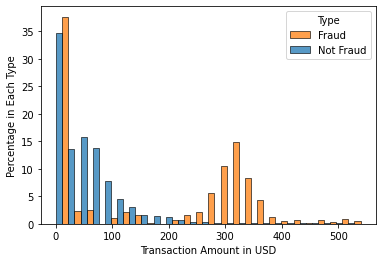

In [88]:
#amount vs fraud
ax=sns.histplot(x='amt',data=fraudData[fraudData.amt<=1000],hue='is_fraud',stat='percent',multiple='dodge',common_norm=False,bins=25)
ax.set_ylabel('Percentage in Each Type')
ax.set_xlabel('Transaction Amount in USD')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

## Association Rule

In [94]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

In [95]:
# Filter the dataset to include only fraudulent transactions
fraudData = fraudData[fraudData['is_fraud'] == 1]

# Select the suitable columns for association rule mining
cols = ['cc_num', 'merchant', 'category', 'amt', 'job']
data = fraudData[cols]

# Convert categorical variables to numerical using one-hot encoding
data = pd.get_dummies(data, columns=['merchant', 'category', 'job'])

# Apply Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(data, min_support=0.01, use_colnames=True)

# Generate association rules from frequent itemsets
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Print the association rules
print(rules)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:111: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



ValueError: The allowed values for a DataFrame are True, False, 0, 1. Found value 3590000000000000.0

In [ ]:

# Filter the dataframe to select only fraud cases
fraud_cases = fraudData[fraudData['is_fraud'] == 1]

# Select the suitable columns for association rule mining
association_columns = ['merchant', 'category', 'amt', 'first', 'last', 'ID', 'gender']
association_df = fraud_cases[association_columns].copy()

# Apply Apriori algorithm to generate frequent itemsets
frequent_itemsets = apriori(association_df, min_support=0.05, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

# Print the generated association rules
print(rules)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:111: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



ValueError: The allowed values for a DataFrame are True, False, 0, 1. Found value fraud_Bashirian Group